## Lab 6 - Forwards and Futures

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

FORWARDS

A **forward** contract is an agreement to buy and sell an asset at a given time in the future, at a price pre-specified today.

There are two dates that are relevant: (a) Contracting date, (b) settlement date.

The pre-specified price is called the "forward price" $F$. The spot price is denoted $S$.  

Suppose you are given:

IBM current price = $100

Risk free interest rate (1 yr)= 2%

Expected return on S&P500 = 10%

IBM beta = 1.5

What is the one year forward price for IBM?

PAYOFF DIAGRAMS

Payoff diagrams depict the cash flows generated by the security at a given date. The payoff of a long position in a forward at price $F$ is a function of the stock price at maturity $S_T$.

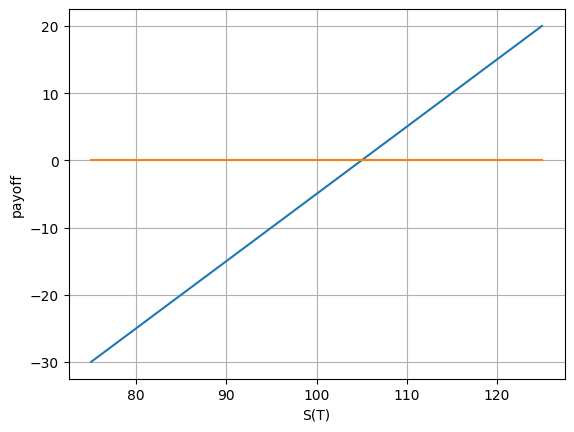

In [2]:
#PAYOFF DIAGRAM
S = np.linspace(75,125,51)
F = 105
payoff = S-F
plt.plot(S, payoff)
plt.xlabel("S(T)")
plt.ylabel("payoff")
plt.plot(S,0*S)
plt.grid()
plt.show()

For a short position, the payoff is $F-S_T$. Forward contract payoffs are linear in $S_T$.

The cash flow at inception of a forward is zero.

# Exercise 1 (3 points)

Implement a function to return the forward price of an asset that pays no coupons or dividends. Use continuous compounding.

In [4]:
def calcForwardPrice1(S0, r, T):

    """
    S0: Spot price of the asset
    r: risk-free interest rate
    T: maturity (in years)
    F0: Forward price
    """

    # Your code goes here
    F0 = S0 * math.exp((r - 1.5 * 0.01) * T)

    return F0


In [8]:
print(f'{calcForwardPrice1(100, 0.02, 1)}')

100.5012520859401


# Exercise 2 (4 points)

Implement a function to return the forward price of an asset that pays the coupons `coupons`. Use continuous compounding. The coupons are given as a tuple of (cashflow, time). For example, the coupons of a bond that pays 4 5-dollar coupons in 6 months, 1 year, 1.5 years, and 2 years can be represented as $$((5, 0.5), (5, 1), (5, 1.5), (5, 2))$$

In [23]:
def calForwardPrice2(S0, coupons, r, T):

    """
    S0: Spot price of the asset
    r: risk-free interest rate
    T: maturity (in years)
    coupons: coupons
    return F0: Forward price
    """

    # Your code goes here
    total = 0
    for cashflow, time in coupons:
      total += cashflow * math.exp(-r*time)
    F0 = (S0 - total) * math.exp(r*T)
    return F0

In [24]:
coupons = ((5, 0.5), (5, 1), (5, 1.5), (5, 2))
print(f'{calForwardPrice2(100, coupons, 0.02, 1)}')

82.11864063197513


# Exercise 3 (3 points)

Implement a function to return the forward price of an asset that pays dividend yield `q`

In [25]:
def calForwardPrice3(S0, q, r, T):

    """
    S0: Spot price of the asset
    r: risk-free interest rate
    q: dividend yield
    T: maturity (in years)
    return F0: Forward price
    """

    # Your code goes here
    F0 = S0 * math.exp((r - q)*T)
    return F0

In [26]:
print(f'{calForwardPrice3(100, 0.02, 0.05, 1)}')


103.0454533953517
